In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/IIITNR_PROJECT/finaldata.csv")

In [ ]:
data

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,17.264660,18.335979,18.548411,18.490954,0.255284,0.133024,0.117905,0.124992,0.054669,0.055324,...,536.499317,0.000310,0.000311,0.000307,0.000312,0.017609,0.017645,0.017518,0.017653,Black Soil
1,38.364171,35.796811,35.933866,39.438942,0.005557,0.121143,0.123396,-0.038545,0.026750,0.028742,...,2414.397388,0.000110,0.000115,0.000113,0.000112,0.010466,0.010707,0.010631,0.010587,Black Soil
2,26.561111,26.534577,27.667824,27.608610,0.141612,0.142929,0.083427,0.080971,0.038653,0.037527,...,1194.448904,0.000166,0.000168,0.000162,0.000166,0.012877,0.012975,0.012721,0.012872,Black Soil
3,12.077756,12.146298,12.335615,12.084356,0.185825,0.127701,0.133605,0.148248,0.086285,0.093907,...,283.144810,0.000908,0.000919,0.000914,0.000914,0.030137,0.030307,0.030239,0.030238,Black Soil
4,9.272283,9.385549,9.434222,9.434664,0.112793,0.086340,0.068770,0.076451,0.104570,0.098324,...,142.388612,0.001156,0.001169,0.001158,0.001159,0.033998,0.034186,0.034026,0.034046,Black Soil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,37.852319,37.496454,37.995849,38.221631,0.024357,0.035430,0.017792,0.016993,0.028417,0.027980,...,2373.899291,0.000166,0.000169,0.000166,0.000166,0.012868,0.013000,0.012891,0.012901,Alluvial soil
1553,34.720000,34.714744,42.830303,45.211538,0.216822,0.241323,-0.073231,-0.145564,0.035693,0.030901,...,2814.878205,0.001353,0.001721,0.001598,0.001685,0.036785,0.041481,0.039972,0.041046,Alluvial soil
1554,30.160684,38.457792,34.868132,37.132035,0.588977,0.457203,0.523287,0.433832,0.093449,0.042744,...,2474.965368,0.000985,0.000736,0.000662,0.000677,0.031392,0.027132,0.025736,0.026019,Alluvial soil
1555,35.360000,35.391026,42.203030,45.983974,0.193665,0.240561,-0.017857,-0.175304,0.027499,0.020426,...,2930.259615,0.001328,0.001700,0.001593,0.001705,0.036443,0.041233,0.039915,0.041295,Alluvial soil


Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'poly'}
Accuracy: 0.9519230769230769
Classification Report:
               precision    recall  f1-score   support

Alluvial soil       0.94      0.98      0.96       108
   Black Soil       0.94      0.91      0.92        79
    Clay soil       1.00      0.96      0.98        50
     Red soil       0.96      0.95      0.95        75

     accuracy                           0.95       312
    macro avg       0.96      0.95      0.95       312
 weighted avg       0.95      0.95      0.95       312



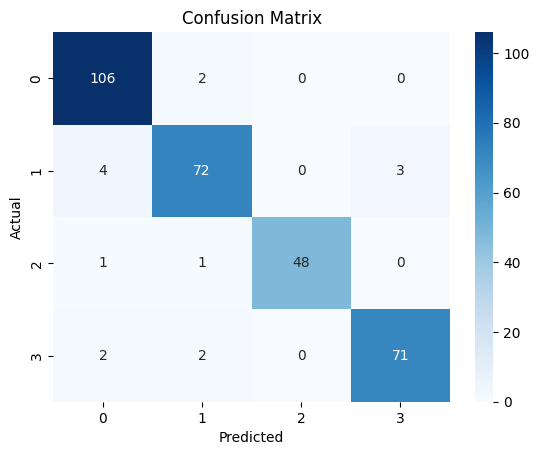

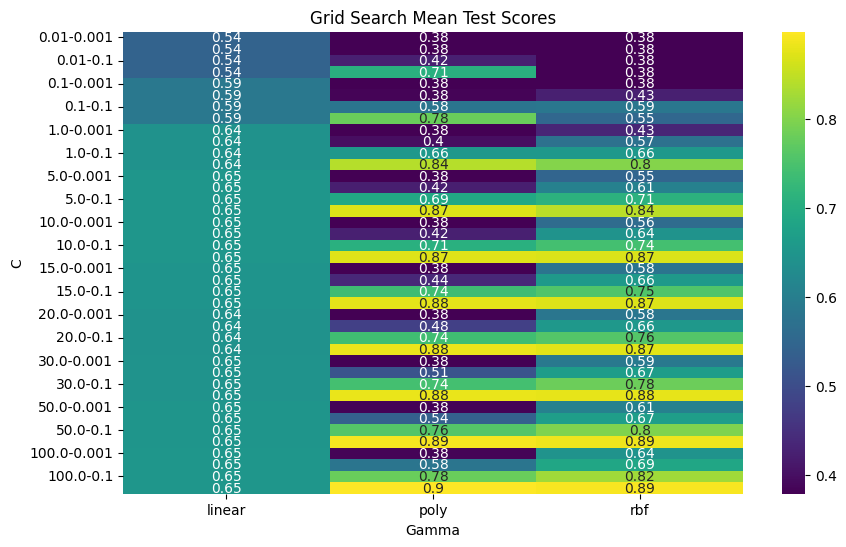

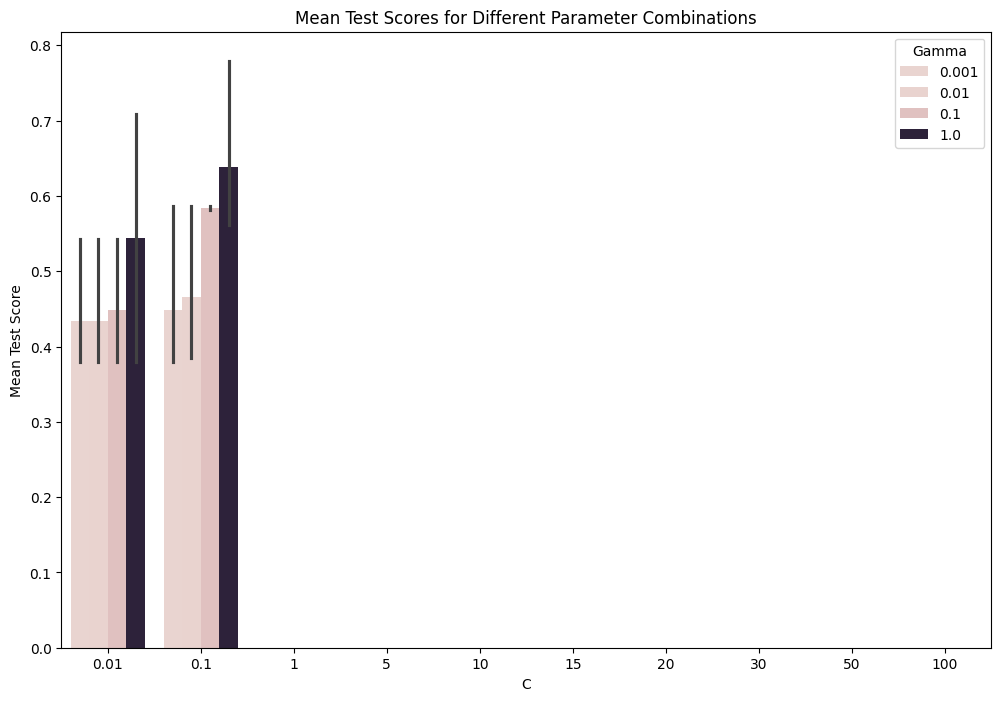

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the data

# Step 2: Preprocess the data
# Assuming 'target' is the column with the labels
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Train the SVM model with different parameters
parameters = {
    'C': [0.01, 0.1, 1, 10, ,5 ,15,20,30,25],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

svc = SVC()
grid_search = GridSearchCV(svc, parameters, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Step 4: Evaluate the model
y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Step 5: Visualize the results
# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extracting results and preparing the DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Prepare a DataFrame in the required format
results_df = results[['param_C', 'param_gamma', 'param_kernel',
                      'split0_test_score', 'split1_test_score', 'split2_test_score',
                      'split3_test_score', 'split4_test_score']]

# Rename the columns
results_df.columns = ['C', 'gamma', 'kernel', 'fold1_accuracy', 'fold2_accuracy',
                      'fold3_accuracy', 'fold4_accuracy', 'fold5_accuracy']

# Save the results DataFrame as a CSV file
results_df.to_csv('svm_grid_search_results_detailed.csv', index=False)

# Group by 'C', 'gamma', 'kernel' and calculate the mean test score
mean_scores = results.groupby(['param_C', 'param_gamma', 'param_kernel'])['mean_test_score'].mean().unstack(level=-1)

# Plotting the performance for different parameters
# Heatmap of mean test scores
plt.figure(figsize=(10, 6))
sns.heatmap(mean_scores, annot=True, cmap='viridis')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Grid Search Mean Test Scores')
plt.show()

# Bar plot of all parameter combinations and their accuracies
plt.figure(figsize=(12, 8))
sns.barplot(x='param_C', y='mean_test_score', hue='param_gamma', data=results)
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Scores for Different Parameter Combinations')
plt.legend(title='Gamma')
plt.show()
